In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
# import SVR, Random Forest and Gradient Boosting
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# import metrics to evaluate the model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# show the correlation between BMI and other features
print(train_df.corr()['BMI'])

WTR      0.132709
WHpR     0.117213
WHdR     0.190418
HpHdR   -0.024627
Area    -0.192730
BMI      1.000000
Name: BMI, dtype: float64


In [4]:
X_train, y_train = train_df.drop(columns=['BMI']), train_df['BMI']
X_test, y_test = test_df.drop(columns=['BMI']), test_df['BMI']

In [5]:
# object to store the results for each model
maes = {'SVR': [], 'Random Forest': [], 'Gradient Boosting': []}
mapes = {'SVR': [], 'Random Forest': [], 'Gradient Boosting': []}
best_params = {'SVR': None, 'Random Forest': None, 'Gradient Boosting': None}
scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']
y_preds = {'SVR': None, 'Random Forest': None, 'Gradient Boosting': None}

In [6]:
# standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**SVR**

In [7]:
# SVR, avoid overfitting using cross-validation, tune the hyperparameters in loops
# then fit the model and predict the test in every loop, save the best hyperparameters and model

best_model = None
best_score = float('inf')

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for C in [0.1, 1, 10]:
        for epsilon in [0.1, 0.5, 1]:
            svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
            grid_search = GridSearchCV(svr, param_grid={}, scoring=scoring, cv=5, refit='neg_mean_absolute_error')
            grid_search.fit(X_train, y_train)
            y_pred = grid_search.predict(X_test)
            mape = mean_absolute_percentage_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            if mae < best_score:
                best_score = mae
                best_model = svr
                best_params['SVR'] = {'kernel': kernel, 'C': C, 'epsilon': epsilon}
            mapes['SVR'].append(mape)
            maes['SVR'].append(mae)

In [8]:
# fit the best model and predict the test data
model = best_model
model.fit(X_train, y_train)
y_preds['SVR'] = model.predict(X_test)

# evaluate the model
mape = mean_absolute_percentage_error(y_test, y_preds['SVR'])
mae = mean_absolute_error(y_test, y_preds['SVR'])
print('SVR')
print('MAPE:', mape)
print('MAE:', mae)
print('Best params: ', best_params['SVR'])

# save the model to a file using pickle
with open('svr_model.pkl', 'wb') as f:
    pickle.dump(model, f)

SVR
MAPE: 0.11807835862011622
MAE: 2.946030309451154
Best params:  {'kernel': 'rbf', 'C': 1, 'epsilon': 0.5}


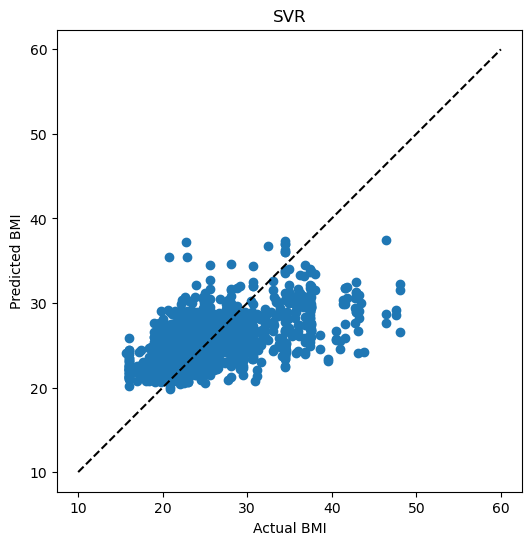

In [9]:
# plot the actual and predicted bmi
# plot figure is square shape
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_preds['SVR'])
plt.plot([10, 60], [10, 60], '--k')
plt.axis('equal')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('SVR')
plt.show()

In [10]:
# Random Forest, avoid overfitting using cross-validation, tune the hyperparameters in loops
# then fit the model and predict the test in every loop, save the best hyperparameters and model

best_model = None
best_score = float('inf')

for n_estimators in [100, 200, 300]:
    for max_depth in [3, 4, 5]:
        for learning_rate in [0.01, 0.1, 0.3]:
            rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
            grid_search = GridSearchCV(rf, param_grid={}, scoring=scoring, cv=5, refit='neg_mean_absolute_error')
            grid_search.fit(X_train, y_train)
            y_pred = grid_search.predict(X_test)
            mape = mean_absolute_percentage_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            if mae < best_score:
                best_score = mae
                best_model = rf
                best_params['Random Forest'] = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}
            mapes['Random Forest'].append(mape)
            maes['Random Forest'].append(mae)

In [11]:
# fit the best model and predict the test data
model = best_model
model.fit(X_train, y_train)
y_preds['Random Forest'] = model.predict(X_test)

# evaluate the model
mape = mean_absolute_percentage_error(y_test, y_preds['Random Forest'])
mae = mean_absolute_error(y_test, y_preds['Random Forest'])
print('Random Forest')
print('MAPE:', mape)
print('MAE:', mae)
print('Best params: ', best_params['Random Forest'])

# save the model to a file using pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(model, f)

Random Forest
MAPE: 0.1257860724925053
MAE: 3.076979489831077
Best params:  {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}


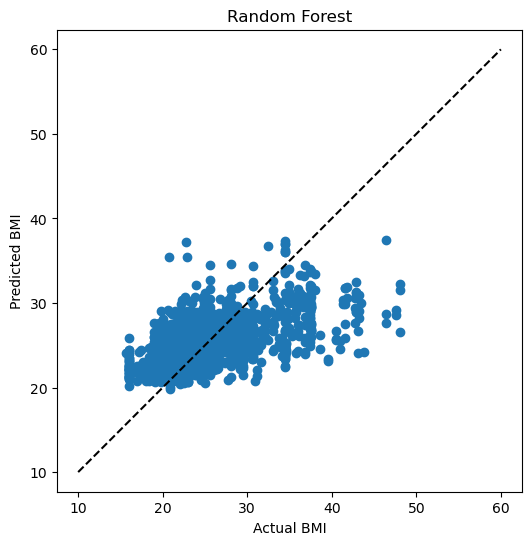

In [12]:
# plot the actual and predicted bmi
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_preds['SVR'])
plt.plot([10, 60], [10, 60], '--k')
plt.axis('equal')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Random Forest')
plt.show()

In [13]:
# Gradient Boosting, avoid overfitting using cross-validation, tune the hyperparameters in loops
# then fit the model and predict the test in every loop, save the best hyperparameters and model

best_model = None
best_score = float('inf')

for n_estimators in [100, 200, 300]:
    for max_depth in [3, 4, 5]:
        for learning_rate in [0.01, 0.1, 0.3]:
            gb = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
            grid_search = GridSearchCV(gb, param_grid={}, scoring=scoring, cv=5, refit='neg_mean_absolute_error')
            grid_search.fit(X_train, y_train)
            y_pred = grid_search.predict(X_test)
            mape = mean_absolute_percentage_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            if mae < best_score:
                best_score = mae
                best_model = gb
                best_params['Gradient Boosting'] = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}
            mapes['Gradient Boosting'].append(mape)
            maes['Gradient Boosting'].append(mae)

In [14]:
# fit the best model and predict the test data
model = best_model
model.fit(X_train, y_train)
y_preds['Gradient Boosting'] = model.predict(X_test)

# evaluate the model
mape = mean_absolute_percentage_error(y_test, y_preds['Gradient Boosting'])
mae = mean_absolute_error(y_test, y_preds['Gradient Boosting'])
print('Gradient Boosting')
print('MAPE:', mape)
print('MAE:', mae)
print('Best params: ', best_params['Gradient Boosting'])

# save the model to a file using pickle
with open('gb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

Gradient Boosting
MAPE: 0.12499333768392273
MAE: 3.0586708888641896
Best params:  {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


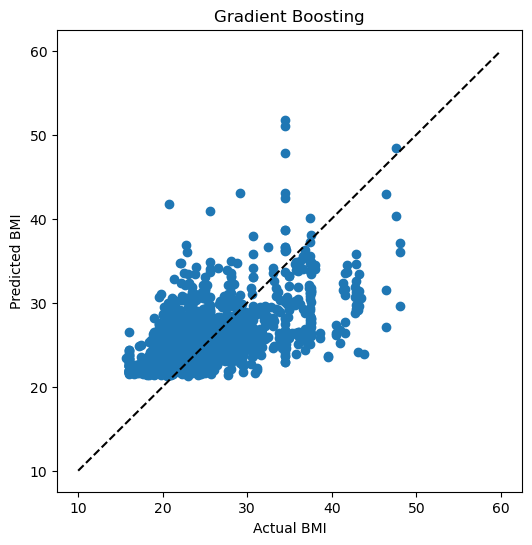

In [15]:
# plot the actual and predicted bmi
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_preds['Gradient Boosting'])
plt.plot([10, 60], [10, 60], '--k')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Gradient Boosting')
plt.show()

In [16]:
# show best params of each model in dataframe format
# NaN = --, because the model does not have the hyperparameter
best_params_df = pd.DataFrame(best_params).T
best_params_df.fillna('--', inplace=True)
best_params_df

,kernel,C,epsilon,n_estimators,max_depth,learning_rate
SVR,rbf,1,0.5,--,--,--
Random Forest,--,--,--,200.0,5.0,0.01
Gradient Boosting,--,--,--,100.0,3.0,0.1


In [17]:
# show the best each score, best params of each measure for each model
for model in ['SVR', 'Random Forest', 'Gradient Boosting']:
    print(model)
    print('MAE:', min(maes[model]))
    print('MAPE:', min(mapes[model]))
    print('Best params:', best_params[model])
    print()

SVR
MAE: 2.946030309451154
MAPE: 0.11807835862011622
Best params: {'kernel': 'rbf', 'C': 1, 'epsilon': 0.5}

Random Forest
MAE: 3.077154201734471
MAPE: 0.12578552263738138
Best params: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}

Gradient Boosting
MAE: 3.05858966783343
MAPE: 0.12497508590723808
Best params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}



In [18]:
# show them in dataframe for comparison, with the index is models
results = pd.DataFrame({'MAE': [min(maes[model]) for model in ['SVR', 'Random Forest', 'Gradient Boosting']],
                        'MAPE': [100*min(mapes[model]) for model in ['SVR', 'Random Forest', 'Gradient Boosting']]},
                       index=['SVR', 'Random Forest', 'Gradient Boosting'])
results

,MAE,MAPE
SVR,2.946030,11.807836
Random Forest,3.077154,12.578552
Gradient Boosting,3.058590,12.497509


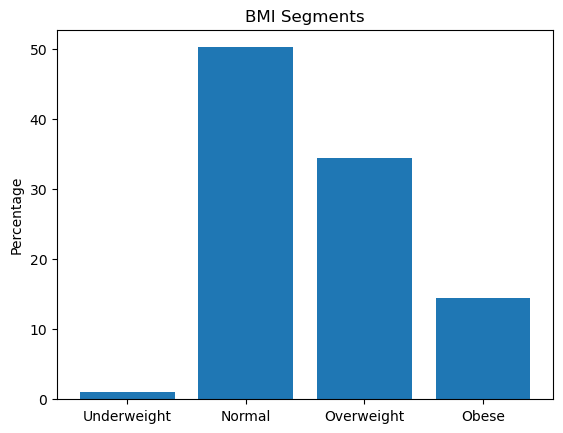

In [19]:
# phân đoạn bmi value trong y_train, underweight, normal, overweight, obese
# sau đó đưa ra tỉ lệ phần trăm của mỗi phân đoạn

# underweight: bmi < 18.5
# normal: 18.5 <= bmi < 25
# overweight: 25 <= bmi < 30
# obese: bmi >= 30

# calculate the percentage of each segment
underweight = (y_train < 18.5).sum() / len(y_train) * 100
normal = ((y_train >= 18.5) & (y_train < 25)).sum() / len(y_train) * 100
overweight = ((y_train >= 25) & (y_train < 30)).sum() / len(y_train) * 100
obese = (y_train >= 30).sum() / len(y_train) * 100

# vẽ biểu đồ cột
plt.bar(['Underweight', 'Normal', 'Overweight', 'Obese'], [underweight, normal, overweight, obese])
plt.ylabel('Percentage')
plt.title('BMI Segments')
plt.show()

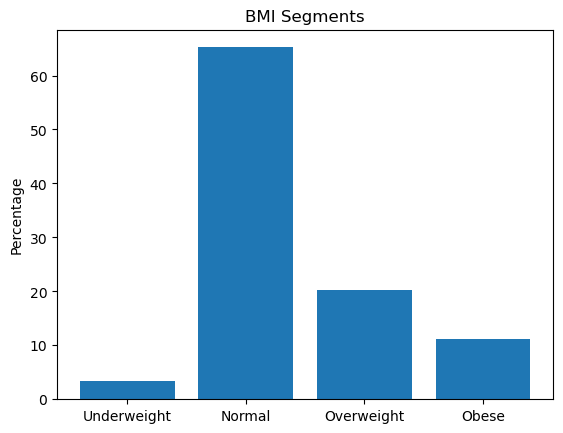

In [20]:
# phân đoạn bmi value trong y_test, underweight, normal, overweight, obese
# sau đó đưa ra tỉ lệ phần trăm của mỗi phân đoạn

# underweight: bmi < 18.5
# normal: 18.5 <= bmi < 25
# overweight: 25 <= bmi < 30
# obese: bmi >= 30

# calculate the percentage of each segment
underweight = (y_test < 18.5).sum() / len(y_test) * 100
normal = ((y_test >= 18.5) & (y_test < 25)).sum() / len(y_test) * 100
overweight = ((y_test >= 25) & (y_test < 30)).sum() / len(y_test) * 100
obese = (y_test >= 30).sum() / len(y_test) * 100

# vẽ biểu đồ cột
plt.bar(['Underweight', 'Normal', 'Overweight', 'Obese'], [underweight, normal, overweight, obese])
plt.ylabel('Percentage')
plt.title('BMI Segments')
plt.show()